In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [4]:
def sys(t, y, p):
    """
    Defines the system of coupled first order differential equations
    
    system is
        d/dt(z) = v
        d/dt(v) = rho0 / m * np.exp(-z / Hn) * V * g - g
    
    Args:
        y = vector of state variables, t = time, p = params
    """
    z,v = y
    rho0, m, Hn, V, g = p
    
    return np.array([
        v,
        rho0 / m * np.exp(-z / Hn) * V * g - g
    ])

rho0 = 1.225
m = 215000
V = 200000
Hn = 10.4e3
g = 9.81
p = [rho0, m, Hn, V, g]

# Initial conditions have x0 = 0, d/dt(x0) = 0
y = [0,0]

# ODE solver params
abserr = 1.0e-8
relerr = 1.0e-6

t0 = 0
tf = int(1e3)
t = np.linspace(0, tf, 100 * tf)

sol = solve_ivp(
    sys, (t0, tf), y, 
    args=(p,), t_eval=t, vectorized=True, rtol=relerr, atol=abserr
)

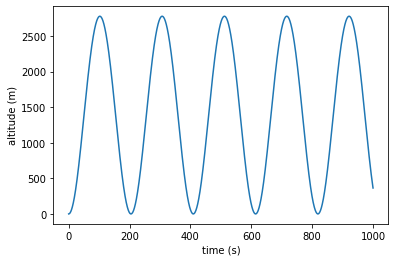

In [5]:
plt.plot(t, sol.y[0])
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.show()

In [6]:
max(sol.y[0])

2778.7318474975696